<a href="https://colab.research.google.com/github/cataa0/ADA-informes/blob/main/OptimalBTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Descripcion del problema

### Problema de optimizacion

Los problemas de optimizacion como su nombre lo dice busca optimizar el trabajo y hacer que el problema se haga de una manera mas rapida y precisa. Los problemas de optimizacion busca minimizar o maximizar el valor de una variable con esto podemos llegar al resultado esperado.

Entrada: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

Salida:Construir un árbol de búsqueda óptimo, es decir, un árbol que minimice la cantidad esperada de nodos visitados (costo esperado).

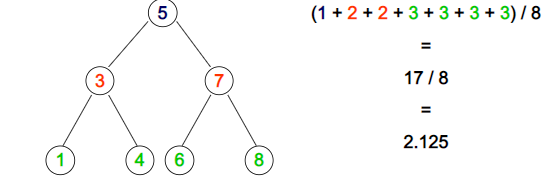

# 2. Descripcion del algoritmo

### Arbol binario de busqueda optimo

Consiste en acceder a la raíz del árbol, si el elemento que buscamos coincide con la raiz deñ arbol, se retorna la raiz y ya se da como concluida la busqueda optima; si el elemento buscado es menor buscamos por el subarbol izquierdo y si es mayor buscamos por el subarbol derecho.

### Algoritmo bottom-up

El metodo bottom-up se basa en una solucion del problema de manera ascendiente, se resuelven partes individuales mas pequeñas para luego ir enlazando los resultados y hacer de manera mas rapida la solucion.

## 2.1 Codigo

In [ ]:
def optCost(freq, i, j):

    if j < i: 
      return 0    
    if j == i:     
        return freq[i]
    fsum = Sum(freq, i, j)
    Min = 999999999999

    for r in range(i, j + 1):
        cost = (optCost(freq, i, r - 1) +
                optCost(freq, r + 1, j))
        if cost < Min:
            Min = cost

    return Min + fsum
 
def optimalSearchTree(keys, freq, n):

    return optCost(freq, 0, n - 1)

def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

keys = [10, 12, 20]
freq = [34, 8, 50]
n = len(keys)
print("Costo optimo:", optimalSearchTree(keys, freq, n))

Costo optimo: 142


In [ ]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(10)

## 2.2 Ejemplo

Tenemos una secuencia de 3 claves *K=[10, 12, 20]* cuya frecuencia es *freq=[34, 8, 50]*

## 2.3 Verbose == True

# 3. Tiempo de ejecucion



```
#Algoritmo OBSTR (Main)
#   Sort A[1..n] and F[1..n] by the keys
#   return findOptimalCost(A, F, 1, n)

#Algoritmo OBSTR(A, F, lef t, right)

# best = +∞
# for i = lef t to right . try each as the root
#   costlef t = findOptimalCost(A, F, lef t, i − 1)
#   costright = findOptimalCost(A, F, i + 1, right)
#   costtotal = costlef t + costright + sumatoria de F[v], donde v toma valor de left a right
#   if costtotal < costbest
#     best = costtotal
# return best

```

Por ende el tiempo de ejecución es  2^O(n) .

### 3.1 Programacion dinamica



```
#Algoritmo OBSTDP

# for size in 1 .. n loop             Todos los tamaños de secuencias
#   for i in 1 .. n-size+1 loop       Todos los puntos de partida de las secuencias.
#     j := i + size - 1
#     e(i, j) := float'max;
#     for r in i .. j loop        -- Todas las raíces de la secuencia ki .. kj
#       t := e(i, r-1) + e(r+1, j) + w(i, j)
#       if t < e(i, j)  then
#         e(i, j) := t
#         root(i, j) := r
#       end if
#     end loop
#   end loop
# end loop
```

Por ende el tiempo de ejecución es  O(n^3) .



# 4.Correctitud

Supongamos que se nos da una lista de claves $k1 < k2 < . . . < k_n$, y una lista de probabilidades $p_i$ que cada llave sea buscada. Un árbol de búsqueda binario óptimo es un $BST T$ que minimiza la búsqueda esperada tiempo.

$\sum\limits_{i=1}^n p_i(depth_T(k_i)+1)$

donde la profundidad de la raíz es 0. Supondremos que las claves son los números $1, 2, . . . , n$. Mediante el uso programación dinámica, sin embargo, podemos resolver el problema de manera eficiente.

Primero calcular el valor numérico del tiempo de búsqueda esperado para un BST óptimo, y luego consideraremos cómo modificar nuestra solución para encontrar el BST correspondiente. Sea $1 ≤ i ≤ j ≤ n$, y sea $T$ cualquier $BST$ en $i, . . . , J$. Definiremos el costo de $T$:

$C(T)$ $=$ $\sum\limits_{l=i}^j p_l(depth_T(l)+1)$

y los subproblemas:

$C_{ij}$ $=$ $min_{T on i,...,j}$$C(T)$


El tiempo de búsqueda esperado para el $BST$ óptimo es $C_{1n}$.

El costo de $T$ es: 

$C(T_L)$ $+$ $C(T_R)$ $+$ $\sum\limits_{l=i}^j p_l$

Y así definimos la recurrencia $C'_{ij}$:

$C'_{ij}$ =  \begin{cases}
    min_{i \leq k \leq j}\{C'_{i, k-1} + C'_{k+1, j}\}+\sum\limits_{l=i}^{j} p_l, & \text{if $i < j$}.\\
    p_i, & \text{if $i = j$}.\\
    0, & \text{if $i > j$}
  \end{cases}

Se pretende que: $C'_{ij}$ =$C_{ij}$

La demostración se hace por inducción en $j − i$, el caso base es trivial.

$C'_{ij}$ $>=$ $C_{ij}$, según el cálculo anterior $C'_{ij}$ es el costo de algunos BST en $i,....,j$ y $C_{ij}$ es el costo de un BST óptimo.

$C'_{ij}$ $<=$ $C_{ij}$, supongamos que la raíz de la BST óptima es $k$. 

Entonces:

$C_{ij}$ = $C_{i, k-1}$ $+$ $C_{k+1, j}$ $+$ $\sum\limits_{l=i}^{j} p_l$

$>=$ $C'_{i, k-1}$ $+$ $C'_{k+1, j}$ + $\sum\limits_{l=i}^{j} p_l$


$>=$ $min_{i \leq k \leq j}\{C'_{i, k-1} + C'_{k+1, j}\}$$+$$\sum\limits_{l=i}^{j} p_l$

$=$ $C'_{ij}

# 5. Experimentacion